In [1]:
# GET DATA
import pandas as pd
import numpy as np

from get_data import get_assets, get_positional_data

get_assets()
positions = get_positional_data()


This process will pip install Kaggle and download data through Kaggle API.

Please confirm that you've downloaded Kaggle JSON credentials into directory

Data Successfully Downloaded


In [41]:
import form_pred
import importlib
importlib.reload(form_pred)
from form_pred import clean_positional

clean_pos = clean_positional(positions)

In [42]:
clean_pos.head()

,FBL0_x,FBR0_x,HBL0_x,HBL1_x,HBR0_x,HBR1_x,QB0_x,QB1_x,RBL0_x,RBL1_x,...,gamePlayId,perc_left,perc_right,perc_behind_los,FB,HB,QB,RB,TE,WR
0,-5.12,0.00,0.0,0.0,0.0,0.0,-1.73,0.0,0.00,0.0,...,201809060075,0.6,0.4,0.333333,1,0,1,1,1,2
6,0.00,0.00,0.0,0.0,0.0,0.0,-1.60,0.0,-7.37,0.0,...,2018090600146,0.6,0.4,0.166667,0,0,1,1,1,3
12,0.00,0.00,0.0,0.0,0.0,0.0,-5.56,0.0,0.00,0.0,...,2018090600168,0.2,0.8,0.500000,0,0,1,2,1,2
18,0.00,0.00,0.0,0.0,0.0,0.0,-5.17,0.0,-4.24,0.0,...,2018090600190,0.4,0.6,0.500000,0,0,1,1,1,3
24,0.00,-4.59,0.0,0.0,0.0,0.0,-4.88,0.0,-1.33,0.0,...,2018090600256,0.4,0.6,0.333333,1,0,1,1,3,0


In [61]:
import ball_movement
import importlib
importlib.reload(ball_movement)
from ball_movement import ball_quadrants, make_quad_chart

quads = ball_quadrants(positions,4)

make_quad_chart(quads)

alt.Chart(...)

In [57]:
import def_clean
importlib.reload(def_clean)
from def_clean import DefensiveCleaning

def_cleaning = DefensiveCleaning(n_cuts=11)
d = def_cleaning.generate_full_df(1, 14)

..............................initializing
..data downloaded...
...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 1 COMPLETE.....

   7.14% COMPLETE   

--- 0.4 minutes elapsed ---

the weeks complete:  [1]
...Week 2 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 2 COMPLETE.....

   14.29% COMPLETE   

--- 0.9 minutes elapsed ---

the weeks complete:  [1 2]
...Week 3 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 3 COMPLETE.....

   21.43% COMPLETE   

--- 1.4 minutes elapsed ---

the weeks complete:  [1 2 3]
...Week 4 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 4 COMPLETE.....

   28.57% COMPLETE   

--- 1.9 minutes elapsed ---



In [59]:
d = pd.read_csv('assets/def_clean_output.csv')
d['extra_blitzers'] = d['numberOfPassRushers'] - d['DL']
d['on_line_coverage'] = d['defendersInTheBox'] - d['numberOfPassRushers']
d.shape

(13945, 188)

The optimal number of components is approximately  5


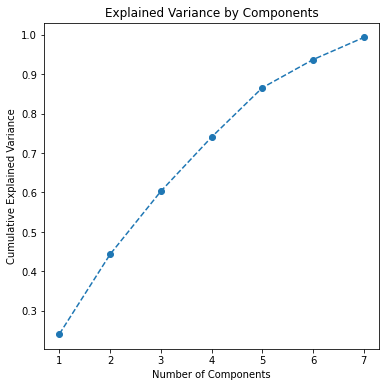

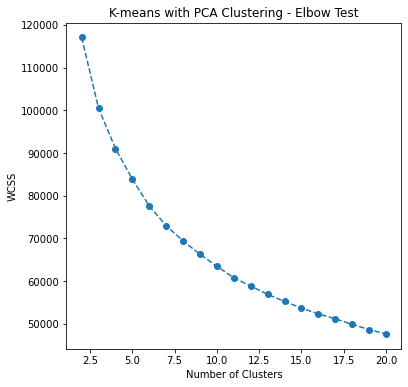

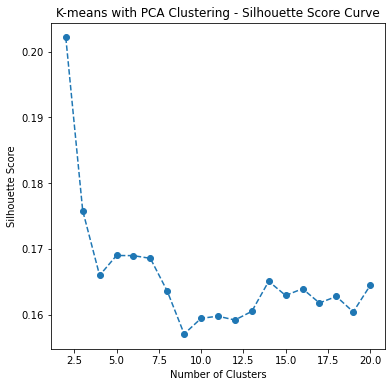

The component names are as follows:  ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']


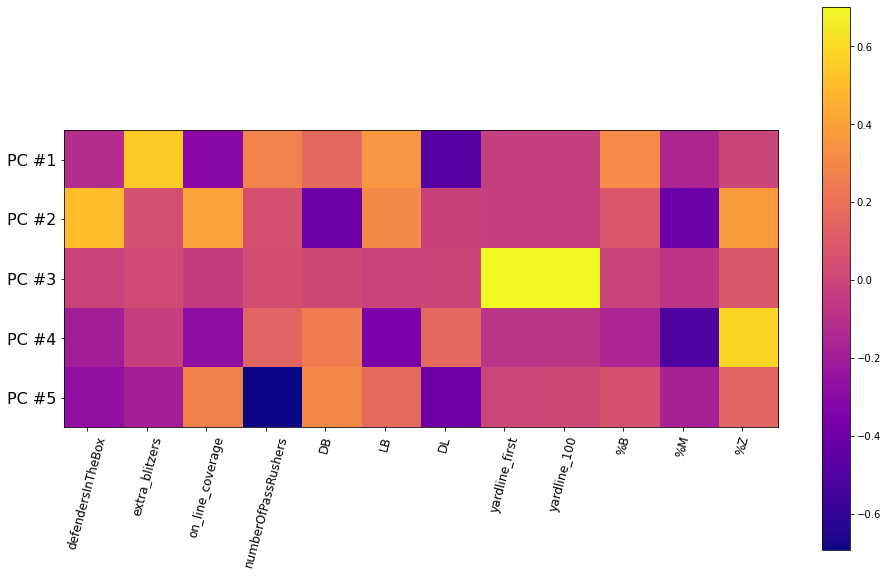

In [60]:
import def_clust
import importlib
importlib.reload(def_clust)
from def_clust import return_pca_and_clusters, kmeans_visual

df_seg = return_pca_and_clusters(d, n_clusters=4)

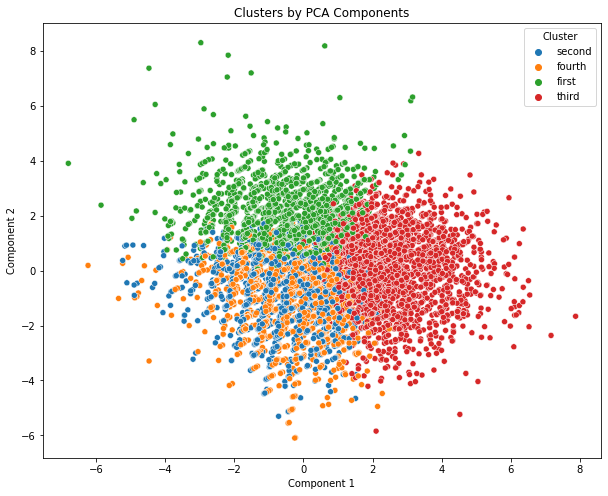

In [63]:
kmeans_visual(df_seg, 'Component 1', 'Component 2')

In [10]:
output_df = def_cleaning.generate_full_df(15, 17, fp='def_clean_output_test.csv')

...Week 15 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 15 COMPLETE.....

   33.33% COMPLETE   

--- 0.5 minutes elapsed ---

the weeks complete:  [15]
...Week 16 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 16 COMPLETE.....

   66.67% COMPLETE   

--- 1.1 minutes elapsed ---

the weeks complete:  [15 16]
...Week 17 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 17 COMPLETE.....

   100.0% COMPLETE   

--- 1.7 minutes elapsed ---

the weeks complete:  [15 16 17]
Defensive cleaning complete --- check assets/def_clean_output_test.csv


In [11]:
d_test = pd.read_csv('assets/def_clean_output_test.csv')
d_test.head()

,gameId,playId,defendersInTheBox,DB,LB,DL,yardline_first,yardline_100,CBL0_act,CBL0_x_start,...,SSL2_y_start,SSR0_act,SSR0_x_start,SSR0_y_start,SSR1_act,SSR1_x_start,SSR1_y_start,SSR2_act,SSR2_x_start,SSR2_y_start
0,2018121300,84,7.0,4,3,4,70.0,76.0,M,6.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018121300,111,6.0,6,1,4,61.0,51.0,M,6.67,...,NaN,M,15.16,2.19,NaN,NaN,NaN,NaN,NaN,NaN
2,2018121300,164,6.0,6,1,4,84.0,74.0,M,3.79,...,NaN,M,5.29,-6.72,NaN,NaN,NaN,NaN,NaN,NaN
3,2018121300,189,5.0,6,1,4,84.0,79.0,M,5.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018121300,211,5.0,6,2,3,84.0,79.0,Z,2.21,...,NaN,Z,5.18,-8.36,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Calculate cosine similarity for defense

full_df, cut_df = def_cleaning.reduce_time(1)
cosine = def_cleaning.cosine_closest_player(cut_df)

...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...closest player based on cosine similarity calculated...


In [13]:
# Players with min and max cosine similarities are shown.
# High values mean that the player is moving in a more similar direction
# Low values mean that the player is moving in a more opposite direction.
cosine.head()

,gameId,playId,posId_def,time_cut_time2,posId_off_max,posId_off_min
0,2018090600,75,CBL0,2,WRR1,RBL0
1,2018090600,75,CBL0,3,WRR0,RBL0
2,2018090600,75,CBL0,4,TEL0,FBR0
3,2018090600,75,CBL0,5,WRR0,FBR0
4,2018090600,75,CBL0,6,WRR0,FBR0


In [13]:
from play_vis import create_starting_chart, create_full_chart

game_id = positions['gameId'].iloc[0]
play_id = positions['playId'].iloc[0]

# Below is an example of how to create the starting chart.
create_starting_chart(positions, game_id, play_id)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)

In [15]:
# Below is an example of how to create the full chart.
create_full_chart(positions, game_id, play_id, n_cuts=20)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)